<a href="https://colab.research.google.com/github/Plagistus/PythonAufgabe02/blob/master/ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(__doc__)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [49]:
from matplotlib.colors import ListedColormap

In [75]:
import pylab as pl

In [5]:
# import Iris datenset
iris = datasets.load_iris()


In [103]:
X = iris.data[:, :2]
y = iris.target

In [82]:
h= .02

K_Value: 1
T_Value: 0.1
[[7 0 0]
 [0 5 0]
 [0 2 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      1.00      0.83         5
           2       1.00      0.33      0.50         3

    accuracy                           0.87        15
   macro avg       0.90      0.78      0.78        15
weighted avg       0.90      0.87      0.84        15



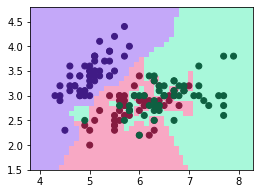

---------------------------------------------
K_Value: 3
T_Value: 0.1
[[7 0 0]
 [0 5 0]
 [0 2 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.71      1.00      0.83         5
           2       1.00      0.33      0.50         3

    accuracy                           0.87        15
   macro avg       0.90      0.78      0.78        15
weighted avg       0.90      0.87      0.84        15



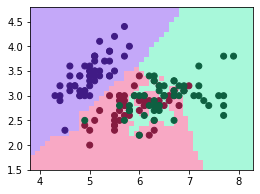

---------------------------------------------
K_Value: 15
T_Value: 0.1
[[7 0 0]
 [0 4 1]
 [0 0 3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.80      0.89         5
           2       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.93      0.92        15
weighted avg       0.95      0.93      0.93        15



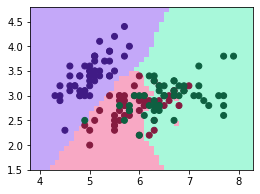

---------------------------------------------
K_Value: 1
T_Value: 0.3
[[16  0  1]
 [ 0  6  8]
 [ 0  6  8]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.50      0.43      0.46        14
           2       0.47      0.57      0.52        14

    accuracy                           0.67        45
   macro avg       0.66      0.65      0.65        45
weighted avg       0.68      0.67      0.67        45



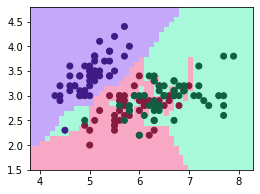

---------------------------------------------
K_Value: 3
T_Value: 0.3
[[16  1  0]
 [ 0  7  7]
 [ 0  8  6]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.44      0.50      0.47        14
           2       0.46      0.43      0.44        14

    accuracy                           0.64        45
   macro avg       0.63      0.62      0.63        45
weighted avg       0.66      0.64      0.65        45



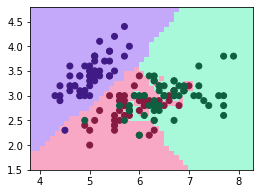

---------------------------------------------
K_Value: 15
T_Value: 0.3
[[17  0  0]
 [ 0  8  6]
 [ 0  5  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.62      0.57      0.59        14
           2       0.60      0.64      0.62        14

    accuracy                           0.76        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.76      0.76      0.76        45



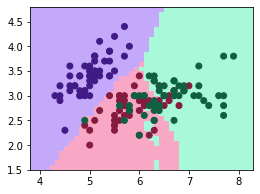

---------------------------------------------


In [106]:
test_range = [0.10, 0.30]
k_range = [1,3,15]

cmap_bold = ListedColormap(['#C4A8F9', '#F8A8C4','#A8F8DA'])
cmap_light = ListedColormap(['#401B85', '#851B40','#0E6041'])

for t in test_range:
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, random_state = 3)
  
  for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    print(f"K_Value: {k}")
    print(f"T_Value: {t}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.figure(1, figsize=(4, 3))
    pl.set_cmap(pl.cm.Paired)
    pl.pcolormesh(xx, yy, Z, cmap=cmap_bold)

    # Plot also the training points
    pl.scatter(X[:,0], X[:,1],c=y , cmap=cmap_light)
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())

    pl.show()
    print("---------------------------------------------")


ValueError: ignored